## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
#%matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata.head()
#display mouse metadata



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# display study result df
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

#rename tumor volume mm3
combined_df = combined_df.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume", "Drug Regimen": "Drug"})
combined_df

,Mouse ID,Drug,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group tumor_vol_df by 'Drug' and 'Timepoint'
# Calculate mean and standard error of the mean (sem) for the 'Tumor Volume'
# groupby drug and timepoint columns
summary_df = combined_df.groupby(["Drug"]).agg({"Tumor Volume" :["mean", "median", "var", "std", "sem"]})
summary_df


Tumor Volume                                          
                  mean     median        var       std       sem
Drug                                                            
Capomulin    40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin     52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol    52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril     55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol     54.331565  52.509285  66.173479  8.134708  0.596466
Placebo      54.033581  52.288934  61.168083  7.821003  0.581331
Propriva     52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane     40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn     54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol    53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

<function matplotlib.pyplot.show(*args, **kw)>

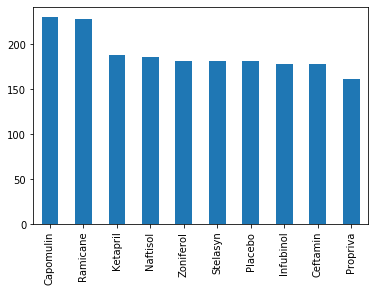

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
df = combined_df["Drug"].value_counts()


df.plot(kind="bar")
plt.show

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot





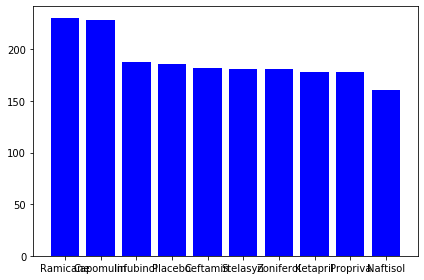

In [15]:
bar_plt = combined_df["Drug"].value_counts()
x_axis = combined_df["Drug"].unique()


plt.bar(x_axis, bar_plt, color="b", align="center")

plt.tight_layout()


## Pie plots

<function matplotlib.pyplot.show(*args, **kw)>

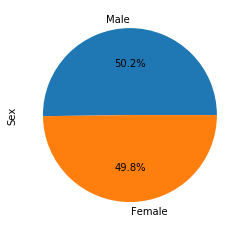

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df = mouse_metadata["Sex"].value_counts()

 
df.plot(kind="pie", autopct="%1.1f%%" )
plt.show


([<matplotlib.patches.Wedge at 0x29a6ce49f98>,
 [Text(-0.0069391759767656585, 1.0999781124353174, ''),
  Text(0.006939175976765524, -1.0999781124353174, '')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

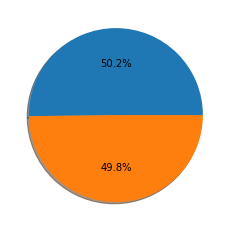

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plt = mouse_metadata["Sex"].value_counts()
#sizes = np.arange(len(pie_plt))

# The colors of each section of the pie chart
colors = ["red", "green"]

plt.pie(pie_plt, #colors=colors,
        autopct="%1.1f%%", shadow=True)

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capo
line_plot = study_results.groupby("Tumor Volume (mm3))
 count_makers = maker_group['maker'].count()                                 


In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen